In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics
from sklearn.model_selection import train_test_split

In [2]:
from PIL import Image

In [3]:
dogs = Image.open("/Users/Pawan Kumar/Downloads/dogs.jpeg")

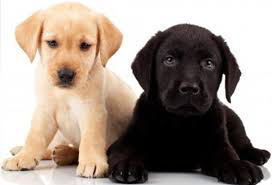

In [25]:
dogs

# Converting the image in to numpy array,so that i can be   used in further processing

In [5]:
np_dogs = np.array(dogs)

In [6]:
np_dogs.shape

(185, 272, 3)

In [7]:
arr = np_dogs.reshape((-1,3))

In [8]:
arr.shape

(50320, 3)

In [9]:
from sklearn.cluster import KMeans

In [41]:
kmean = KMeans(n_clusters=3, n_init=100, random_state=8380)

In [42]:
kmean.fit(arr)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=100, n_jobs=None, precompute_distances='auto',
       random_state=8380, tol=0.0001, verbose=0)

In [43]:
df = pd.DataFrame(arr)

In [44]:
df['label'] = pd.DataFrame(kmean.labels_)

In [45]:
df.groupby('label').count().reset_index()

,label,0,1,2
0,0,12228,12228,12228
1,1,18293,18293,18293
2,2,19799,19799,19799


In [46]:
center = np.uint8(kmean.cluster_centers_)

In [47]:
res = center[kmean.labels_.flatten()]
result_image = res.reshape((arr.shape))

In [48]:
result = result_image.reshape((185, 272, 3))

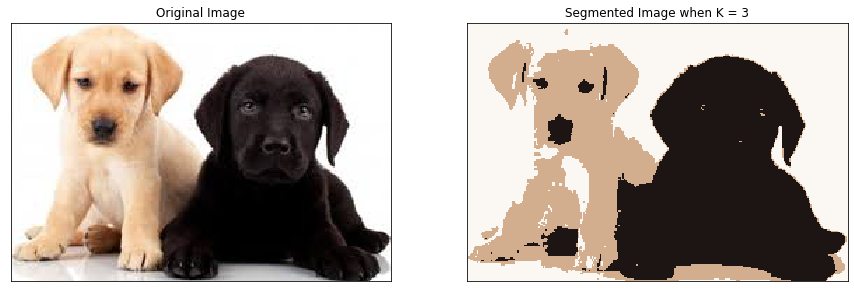

In [49]:
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(dogs)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(result)
plt.title('Segmented Image when K = %i' % 3), plt.xticks([]), plt.yticks([])
plt.show()